# Probability and statistics in Python

### Import libs

In [191]:
from scipy.stats import shapiro
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn import datasets

### Import Dataset

In [192]:
import pandas as pd

data = pd.read_csv('../data/US_youtube_trending_data.csv', header=0)

print(f"Number of rows and columns: {data.shape}")
data.head(25)

Number of rows and columns: (53791, 16)


,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
0,3C66w5Z0ixs,I ASKED HER TO BE MY GIRLFRIEND...,2020-08-11T19:20:14Z,UCvtRTOMP2TqYqu51xNrqAzg,Brawadis,22,2020-08-12T00:00:00Z,brawadis|prank|basketball|skits|ghost|funny vi...,1514614,156908,5855,35313,https://i.ytimg.com/vi/3C66w5Z0ixs/default.jpg,False,False,SUBSCRIBE to BRAWADIS ▶ http://bit.ly/Subscrib...
1,M9Pmf9AB4Mo,Apex Legends | Stories from the Outlands – “Th...,2020-08-11T17:00:10Z,UC0ZV6M2THA81QT9hrVWJG3A,Apex Legends,20,2020-08-12T00:00:00Z,Apex Legends|Apex Legends characters|new Apex ...,2381688,146739,2794,16549,https://i.ytimg.com/vi/M9Pmf9AB4Mo/default.jpg,False,False,"While running her own modding shop, Ramya Pare..."
2,J78aPJ3VyNs,I left youtube for a month and THIS is what ha...,2020-08-11T16:34:06Z,UCYzPXprvl5Y-Sf0g4vX-m6g,jacksepticeye,24,2020-08-12T00:00:00Z,jacksepticeye|funny|funny meme|memes|jacksepti...,2038853,353787,2628,40221,https://i.ytimg.com/vi/J78aPJ3VyNs/default.jpg,False,False,I left youtube for a month and this is what ha...
3,kXLn3HkpjaA,XXL 2020 Freshman Class Revealed - Official An...,2020-08-11T16:38:55Z,UCbg_UMjlHJg_19SZckaKajg,XXL,10,2020-08-12T00:00:00Z,xxl freshman|xxl freshmen|2020 xxl freshman|20...,496771,23251,1856,7647,https://i.ytimg.com/vi/kXLn3HkpjaA/default.jpg,False,False,Subscribe to XXL → http://bit.ly/subscribe-xxl...
4,VIUo6yapDbc,Ultimate DIY Home Movie Theater for The LaBran...,2020-08-11T15:10:05Z,UCDVPcEbVLQgLZX0Rt6jo34A,Mr. Kate,26,2020-08-12T00:00:00Z,The LaBrant Family|DIY|Interior Design|Makeove...,1123889,45802,964,2196,https://i.ytimg.com/vi/VIUo6yapDbc/default.jpg,False,False,Transforming The LaBrant Family's empty white ...
5,w-aidBdvZo8,I Haven't Been Honest About My Injury.. Here's...,2020-08-11T20:00:04Z,UC5zJwsFtEs9WYe3A76p7xIA,Professor Live,24,2020-08-12T00:00:00Z,Professor injury|professor achilles|professor ...,949491,77487,746,7506,https://i.ytimg.com/vi/w-aidBdvZo8/default.jpg,False,False,Subscribe To My Channel - https://www.youtube....
6,uet14uf9NsE,OUR FIRST FAMILY INTRO!!,2020-08-12T00:17:41Z,UCDSJCBYqL7VQrlXfhr1RtwA,Les Do Makeup,26,2020-08-12T00:00:00Z,[None],470446,47990,440,4558,https://i.ytimg.com/vi/uet14uf9NsE/default.jpg,False,False,Hi babygirls! Thank you so much for watching ...
7,ua4QMFQATco,CGP Grey was WRONG,2020-08-11T17:15:11Z,UC2C_jShtL725hvbm1arSV9w,CGP Grey,27,2020-08-12T00:00:00Z,cgpgrey|education|hello internet,1050143,89190,854,6455,https://i.ytimg.com/vi/ua4QMFQATco/default.jpg,False,False,‣ What Was TEKOI: https://www.youtube.com/watc...
8,SnsPZj91R7E,SURPRISING MY DAD WITH HIS DREAM TRUCK!! | Lou...,2020-08-10T22:26:59Z,UCZDdF_p-L88NWVpzF0vjvMQ,Louie's Life,24,2020-08-12T00:00:00Z,surprising|dad|father|papa|with|dream|car|truc...,1402687,95694,2158,6613,https://i.ytimg.com/vi/SnsPZj91R7E/default.jpg,False,False,"Since I was little, i've had these goals for m..."
9,SsWHMAhshPQ,Ovi x Natanael Cano x Aleman x Big Soto - Veng...,2020-08-11T23:00:10Z,UC648rgJOboZlgcDbW00vTSA,Rancho Humilde,10,2020-08-12T00:00:00Z,Vengo De Nada|Aleman|Ovi|Big Soto|Trap|Ovi Nat...,741028,113983,4373,5618,https://i.ytimg.com/vi/SsWHMAhshPQ/default.jpg,False,False,Vengo De Nada - Ovi x Natanael Cano x Aleman x...


## Data Treatment

### Check duplicates

In [193]:
# TODO: print duplicates
duplicated = data.duplicated()
num_duplicated = 0

for isDuplicated in duplicated:
    num_duplicated += 1 if num_duplicated else 0

print(f"Number of duplicated values: {num_duplicated}")

Number of duplicated values: 0


In [194]:
#TODO: fix duplicates

### Check NAN values

In [195]:
# TODO: print NAN values

In [196]:
# TODO: fix NAN

In [197]:
import numpy as np

## Select target(y) and atribute (x)

In [198]:
numpy_data = data.to_numpy()

In [199]:
x = data['categoryId']

x.head(25)

0     22
1     20
2     24
3     10
4     26
5     24
6     26
7     27
8     24
9     10
10    22
11    22
12    20
13    10
14    23
15    22
16    24
17    22
18    26
19    10
20    28
21     1
22    24
23    24
24    22
Name: categoryId, dtype: int64

In [200]:
y = data['view_count']

y.head(25)

0      1514614
1      2381688
2      2038853
3       496771
4      1123889
5       949491
6       470446
7      1050143
8      1402687
9       741028
10      940036
11      591837
12      320872
13      413372
14      921261
15      105955
16     1007540
17      277338
18     1648441
19     5999732
20    14684474
21      833369
22     3061467
23     3662673
24     2630410
Name: view_count, dtype: int64

## Mean

In [201]:
mean_x = np.mean(x)
print(f"Mean(x): {mean_x}")

Mean(x): 18.622594857875853


In [202]:
mean_y = np.mean(y)
print(f"Mean(y): {mean_y}")

Mean(y): 2706730.433659906


## Variance

In [203]:
var_x = np.var(x)
print(f"Var(x): {var_x}")

Var(x): 49.69740845512702


In [204]:
var_y = np.var(y)
print(f"Var(y): {var_y}")

Var(y): 37743547310036.03


## Standard Deviation

In [205]:
std_x = np.std(x)
print(f"STD(x): {mean_x}")


STD(x): 18.622594857875853


In [206]:
std_y = np.std(y)
print(f"STD(y): {std_y}")


STD(y): 6143577.72881861


## Median

In [207]:
median_x = np.median(x)
print(f"Median(x): {median_x}")


Median(x): 20.0


In [208]:
median_y = np.median(y)
print(f"Median(y): {median_y}")

Median(y): 1129434.0


## Histogram

In [209]:
import matplotlib.pyplot as plt
from scipy import stats

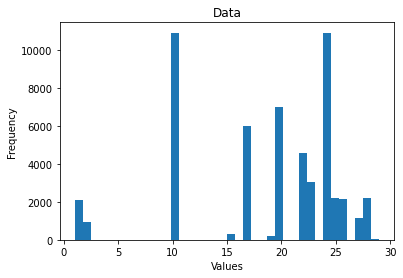

In [210]:
# (X histogram)

plt.hist(x, bins = 'auto')
plt.title('Data')
plt.ylabel('Frequency')
plt.xlabel('Values')
plt.show()

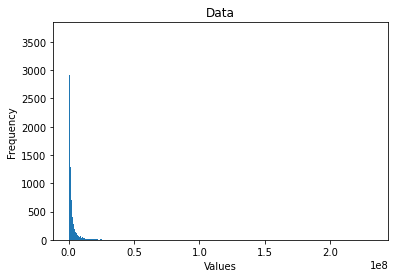

In [211]:
# (Y histogram)

plt.hist(y, bins = 'auto')
plt.title('Data')
plt.ylabel('Frequency')
plt.xlabel('Values')
plt.show()

## X and Y Correlation

In [212]:
# (Correlation Coefficients XY)

np.corrcoef(x, y)

array([[ 1.        , -0.08332816],
       [-0.08332816,  1.        ]])

## Normal Distribution

### X

In [213]:
from scipy.stats import shapiro

In [214]:
# Check if categoryId has normal distribution

x = numpy_data[:5000, 5]
# Normality test
stat, p  = shapiro(x)
print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpretação
alpha = 0.05
if p > alpha:
    print('Gaussian (accepts H0)')
else:
    print('Non-Gaussian (rejects H0)')

Statistics=0.868, p=0.000
Non-Gaussian (rejects H0)


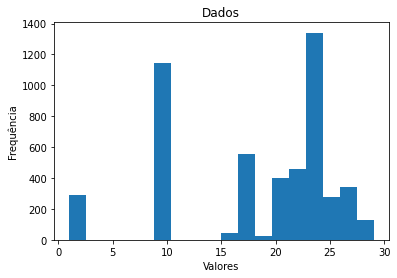

In [215]:
# Verification in histogram
plt.hist(x, bins = 'auto')
plt.title('Dados')
plt.ylabel('Frequência')
plt.xlabel('Valores')
plt.show()

### Y

In [216]:
# Check if view_count has normal distribution

y = numpy_data[:5000, 8]

# Normality test
stat, p  = shapiro(y)
print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpretação
alpha = 0.05
if p > alpha:
    print('Gaussian (accepts H0)')
else:
    print('Non-Gaussian (rejects H0)')

Statistics=0.189, p=0.000
Non-Gaussian (rejects H0)


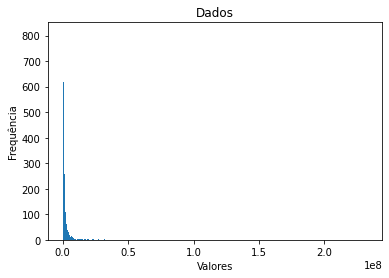

In [217]:
# Verification in histogram
plt.hist(y, bins = 'auto')
plt.title('Dados')
plt.ylabel('Frequência')
plt.xlabel('Valores')
plt.show()